In [14]:
import os
import csv
import requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

In [15]:
prices_csv = ("resources/redfin_texas_counties.csv")

# Read with Pandas
prices_df= pd.read_csv(prices_csv)
prices_df.head()




,Unnamed: 0,period_begin,period_end,region,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,...,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,county
0,139,2012-01-01,2012-01-31,"Williamson County, TX",Texas,TX,Multi-Family (2-4 Unit),4,152500.0,0.155303,...,0.043478,-0.164855,-0.096307,0.400000,-0.400000,0.066667,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County
1,299,2019-05-01,2019-05-31,"Williamson County, TX",Texas,TX,Condo/Co-op,3,237000.0,0.013904,...,0.212766,-0.187234,-0.103024,0.571429,-0.211180,0.071429,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County
2,474,2019-06-01,2019-06-30,"Williamson County, TX",Texas,TX,Single Family Residential,6,291000.0,-0.029863,...,0.336561,0.040325,-0.032895,0.505759,-0.006931,0.056208,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County
3,505,2012-04-01,2012-04-30,"Williamson County, TX",Texas,TX,Multi-Family (2-4 Unit),4,154950.0,0.029568,...,0.113636,-0.021499,-0.069462,0.571429,0.171429,0.428571,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County
4,1400,2015-08-01,2015-08-31,"Williamson County, TX",Texas,TX,Multi-Family (2-4 Unit),4,219000.0,0.120205,...,NaN,NaN,NaN,0.777778,0.215278,0.777778,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County


In [16]:
print(prices_df.columns)

Index(['Unnamed: 0', 'period_begin', 'period_end', 'region', 'state',
       'state_code', 'property_type', 'property_type_id', 'median_sale_price',
       'median_sale_price_mom', 'median_sale_price_yoy', 'median_list_price',
       'median_list_price_mom', 'median_list_price_yoy', 'median_ppsf',
       'median_ppsf_mom', 'median_ppsf_yoy', 'median_list_ppsf',
       'median_list_ppsf_mom', 'median_list_ppsf_yoy', 'homes_sold',
       'homes_sold_mom', 'homes_sold_yoy', 'pending_sales',
       'pending_sales_mom', 'pending_sales_yoy', 'new_listings',
       'new_listings_mom', 'new_listings_yoy', 'inventory', 'inventory_mom',
       'inventory_yoy', 'months_of_supply', 'months_of_supply_mom',
       'months_of_supply_yoy', 'median_dom', 'median_dom_mom',
       'median_dom_yoy', 'avg_sale_to_list', 'avg_sale_to_list_mom',
       'avg_sale_to_list_yoy', 'sold_above_list', 'sold_above_list_mom',
       'sold_above_list_yoy', 'price_drops', 'price_drops_mom',
       'price_drops_yoy', 'o

In [17]:
# ALL RESIDENTIAL Filter
austin_df = prices_df.loc[(prices_df['property_type'] == 'All Residential')]


#Creating a year column.  
austin_df['year'] = pd.DatetimeIndex(austin_df['period_end']).year

# Let's make sure 'date' is actually a date in pandas
austin_df["date"] = pd.to_datetime(austin_df["period_end"])

#Filter on #2018-2022
years = [2020, 2021, 2022]
austin_df = austin_df.loc[austin_df['year'].isin(years)]
austin_df = austin_df.sort_values('period_end')
austin_df.head()

,Unnamed: 0,period_begin,period_end,region,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,...,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,county,year,date
336,125551,2020-01-01,2020-01-31,"Caldwell County, TX",Texas,TX,All Residential,-1,242500.0,0.182927,...,0.017165,0.642857,0.531746,0.169173,"Austin, TX",12420.0,2022-11-20 14:36:43,Caldwell County,2020,2020-01-31
87,29208,2020-01-01,2020-01-31,"Williamson County, TX",Texas,TX,All Residential,-1,278500.0,-0.029617,...,-0.046730,0.478912,0.147228,0.044129,"Austin, TX",12420.0,2022-11-20 14:36:43,Williamson County,2020,2020-01-31
1014,382200,2020-01-01,2020-01-31,"Bastrop County, TX",Texas,TX,All Residential,-1,250000.0,0.024590,...,-0.075841,0.425926,0.128054,-0.061879,"Austin, TX",12420.0,2022-11-20 14:36:43,Bastrop County,2020,2020-01-31
2442,768958,2020-01-01,2020-01-31,"Travis County, TX",Texas,TX,All Residential,-1,353000.0,-0.032877,...,-0.030216,0.551908,0.180806,0.077080,"Austin, TX",12420.0,2022-11-20 14:36:43,Travis County,2020,2020-01-31
2429,767603,2020-01-01,2020-01-31,"Hays County, TX",Texas,TX,All Residential,-1,256000.0,-0.051852,...,-0.034545,0.393162,0.118162,-0.014245,"Austin, TX",12420.0,2022-11-20 14:36:43,Hays County,2020,2020-01-31


In [18]:
listing_df = austin_df.filter(['period_begin', 'period_end', 'region', 'property_type', 'median_sale_price', 'median_list_price', 'median_list_price_yoy', 'new_listings', 'new_listings_yoy', 'city',  'county', 'year', 'date'])
listing_df.head()

,period_begin,period_end,region,property_type,median_sale_price,median_list_price,median_list_price_yoy,new_listings,new_listings_yoy,county,year,date
336,2020-01-01,2020-01-31,"Caldwell County, TX",All Residential,242500.0,221950.0,-0.111845,34.0,0.030303,Caldwell County,2020,2020-01-31
87,2020-01-01,2020-01-31,"Williamson County, TX",All Residential,278500.0,290000.0,0.038459,982.0,0.112118,Williamson County,2020,2020-01-31
1014,2020-01-01,2020-01-31,"Bastrop County, TX",All Residential,250000.0,263387.0,0.173216,100.0,0.176471,Bastrop County,2020,2020-01-31
2442,2020-01-01,2020-01-31,"Travis County, TX",All Residential,353000.0,398745.0,0.123241,1536.0,-0.007752,Travis County,2020,2020-01-31
2429,2020-01-01,2020-01-31,"Hays County, TX",All Residential,256000.0,290495.0,0.098280,348.0,0.023529,Hays County,2020,2020-01-31


In [19]:
#write csv for use in fed rate files 
listing_df.to_csv('clean_data.csv')


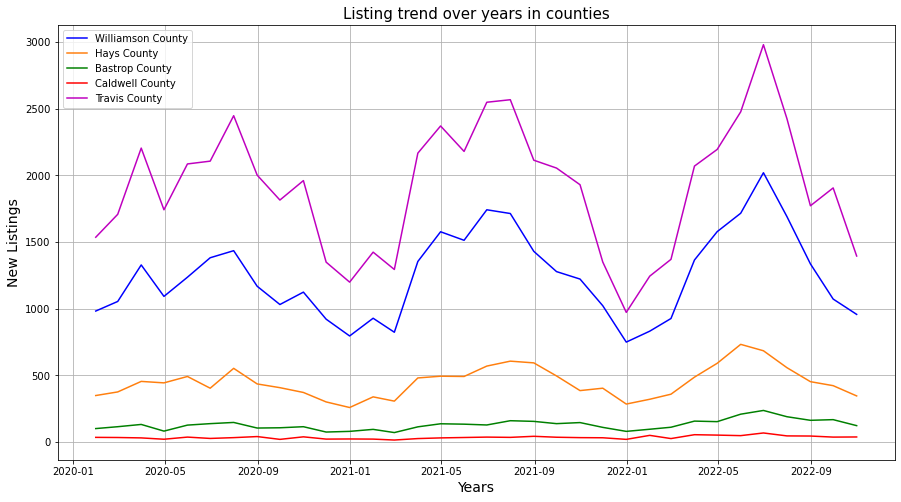

In [20]:
#plot the new listings over years

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
w = listing_df.loc[(listing_df['region'] == 'Williamson County, TX')]
h= listing_df.loc[(listing_df['region'] == 'Hays County, TX')]
b= listing_df.loc[(listing_df['region'] == 'Bastrop County, TX')]
c= listing_df.loc[(listing_df['region'] == 'Caldwell County, TX')]
t= listing_df.loc[(listing_df['region'] == 'Travis County, TX')]



plt.plot(w['date'], w['new_listings'], color="b", label = 'Williamson County')
plt.plot(h['date'], h['new_listings'], color="tab:orange", label = 'Hays County')
plt.plot(b['date'], b['new_listings'], color="g", label ='Bastrop County')
plt.plot(c['date'], c['new_listings'], color="r", label = 'Caldwell County')
plt.plot(t['date'], t['new_listings'], color="m",label ='Travis County')

plt.title('Listing trend over years in counties',fontsize =15)
plt.xlabel('Years',fontsize =14)
plt.ylabel('New Listings',fontsize =14)

plt.grid()
plt.legend()


plt.show()

Text(0, 0.5, 'Listings')

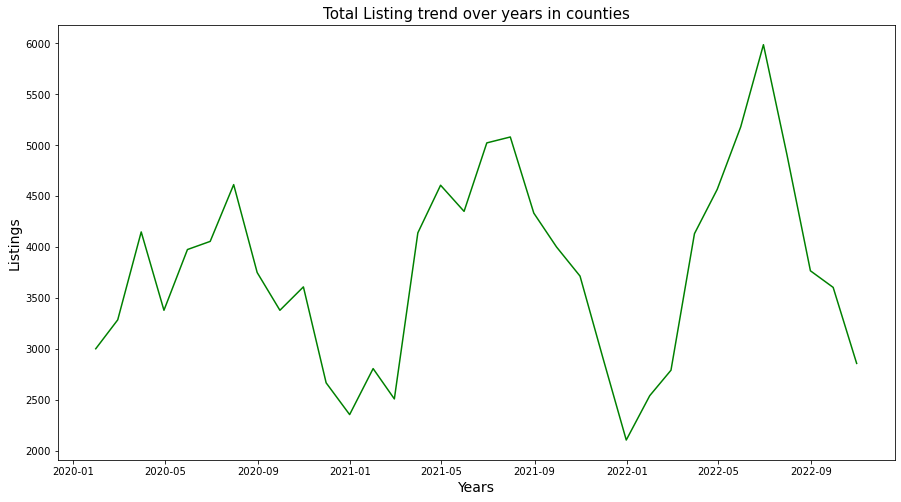

In [8]:

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
listings = listing_df.groupby(['date'])['new_listings'].sum()
listings_df = pd.DataFrame(listings)
listings_df.reset_index(inplace=True)
listings_df

plt.plot(listings_df['date'], listings_df['new_listings'], color = "g")

plt.title('Total Listing trend over years in counties',fontsize =15)
plt.xlabel('Years',fontsize =14)
plt.ylabel('Listings',fontsize =14)


In [9]:
from scipy.stats import linregress

In [10]:

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(listing_df['median_sale_price'],listing_df['new_listings'])[0],2)
print(f"The correlation between median sale price and new listing is {corr}")

The correlation between median sale price and new listing is 0.71


In [11]:
x_values = listing_df['median_sale_price']
y_values = listing_df['new_listings']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.005427872890850308
intercept:-1282.427343851919
rvalue (Correlation coefficient):0.7147770073919189
pandas (Correlation coefficient):0.71
stderr:0.0004097326249965904
y = 0.01x + -1282.43


The r-squared is: 0.5109061702961473


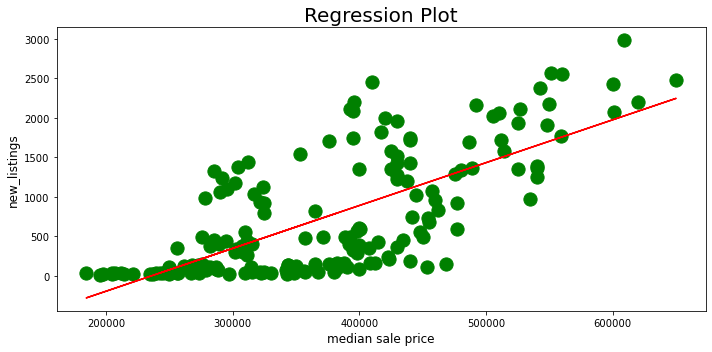

In [12]:

# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(x_values,y_values,s=175, color="g")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot',fontsize =20)
plt.xlabel('median sale price',fontsize =12)
plt.ylabel('new_listings',fontsize =12)
ax1.annotate(line_eq, xy=(10, 20), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=20,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.show()


The plot shows as listings were higher when the prices were lower. 

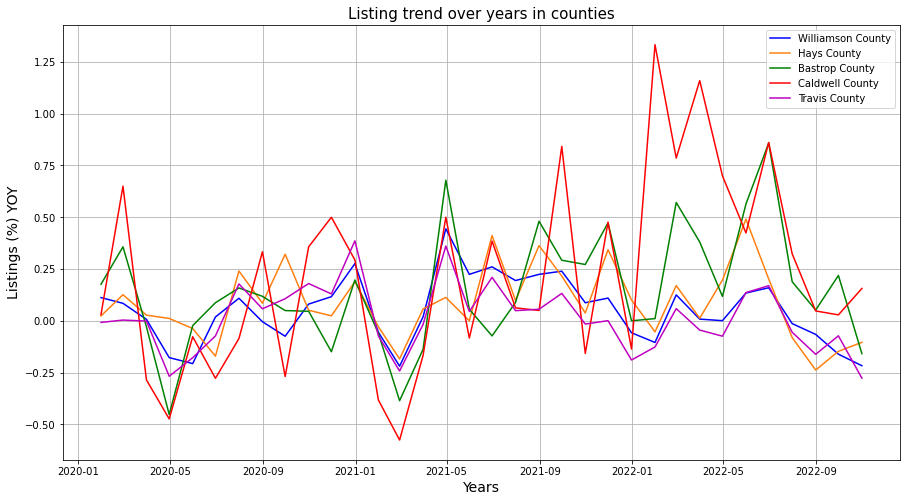

In [13]:
#plot the new listings over years

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
w = listing_df.loc[(listing_df['region'] == 'Williamson County, TX')]
h= listing_df.loc[(listing_df['region'] == 'Hays County, TX')]
b= listing_df.loc[(listing_df['region'] == 'Bastrop County, TX')]
c= listing_df.loc[(listing_df['region'] == 'Caldwell County, TX')]
t= listing_df.loc[(listing_df['region'] == 'Travis County, TX')]



plt.plot(w['date'], w['new_listings_yoy'], color="b", label = 'Williamson County')
plt.plot(h['date'], h['new_listings_yoy'], color="tab:orange", label = 'Hays County')
plt.plot(b['date'], b['new_listings_yoy'], color="g", label ='Bastrop County')
plt.plot(c['date'], c['new_listings_yoy'], color="r", label = 'Caldwell County')
plt.plot(t['date'], t['new_listings_yoy'], color="m",label ='Travis County')

plt.title('Listing trend over years in counties',fontsize =15)
plt.xlabel('Years',fontsize =14)
plt.ylabel('Listings (%) YOY',fontsize =14)

plt.grid()
plt.legend()


plt.show()